In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
clean_image = cv2.imread("/content/drive/MyDrive/DIP/A2/barbara_gray.bmp",0)

In [4]:
clean_image.shape

(512, 512)

In [5]:
row, col = clean_image.shape

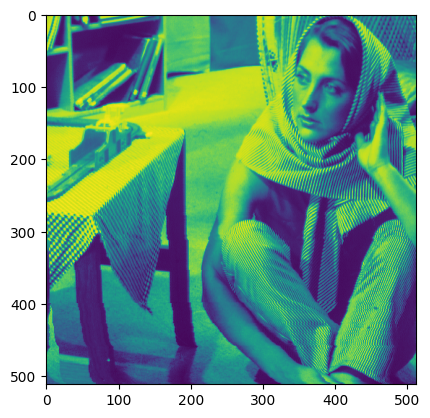

In [6]:
plt.imshow(clean_image)

# Adding Salt n Pepper Noise

In [7]:
def add_salt_n_pepper_noise(image, percentage):
  row, col = image.shape

  number_of_corrupted_pixels = (512*512*percentage)//100

  image2 = image.copy()

  for i in range(number_of_corrupted_pixels):

      x = random.randint(0, row-1)
      y = random.randint(0, col-1)

      a = random.randint(0, row-1)
      b = random.randint(0, col-1)

      image2[x][y] = 255  # setting pixels to while
      image2[a][b] = 0    # setting pixel to black

  return image2

# Calculte PSNR

In [8]:
def calculate_psnr(clean_image, denoised_image):
    # Ensure the images have the same shape
    if clean_image.shape != denoised_image.shape:
        raise ValueError("Images must have the same dimensions.")

    mse = np.mean((clean_image - denoised_image) ** 2)

    # If MSE is very close to zero, return a high PSNR value (e.g., infinity)
    if mse == 0:
        return float('inf')

    max_pixel_value = 255

    # Calculate PSNR using the formula
    psnr = 10 * math.log10((max_pixel_value ** 2) / mse)

    return psnr

# Apply 3x3 Median Filter

In [9]:
def apply_3x3_filter(five_percent_corrupted):

  median_3x3_denoise_image = np.zeros((row, col), dtype=clean_image.dtype)
  image4 = np.pad(five_percent_corrupted, ((1, 1), (1, 1)), mode='constant', constant_values=0)

  for i in range(1, row+1):
    for j in range(1, col+1):

      neighbours = [image4[i - 1, j - 1], image4[i - 1, j], image4[i - 1, j + 1],
                    image4[i, j - 1], image4[i, j], image4[i, j + 1],
                    image4[i + 1, j - 1], image4[i + 1, j], image4[i + 1, j + 1]]

      neighbours_sorted = np.sort(neighbours)
      median_3x3_denoise_image[i -1][j-1] = neighbours_sorted[4]

  return median_3x3_denoise_image

# Apply 4x4 Median Filter

In [10]:
def apply_4x4_filter(fivteen_percent_corrupted):

  median_4x4_denoise_image = np.zeros((row, col), dtype=clean_image.dtype)
  image4 = np.pad(fivteen_percent_corrupted, ((1, 2), (1, 2)), mode='constant', constant_values=0)

  for i in range(1, row+1):
    for j in range(1, col+1):

      neighbours = [image4[i - 1, j - 1], image4[i - 1, j], image4[i - 1, j + 1], image4[i-1, j+2],
                    image4[i, j - 1], image4[i, j], image4[i, j + 1], image4[i, j+2],
                    image4[i + 1, j - 1], image4[i + 1, j], image4[i + 1, j + 1], image4[i+1, j+2],
                    image4[i+2, j-1], image4[i+2, j], image4[i+2, j+1], image4[i+2, j+2]]

      neighbours_sorted = np.sort(neighbours)
      median_4x4_denoise_image[i-1][j-1] = neighbours_sorted[7]

  return median_4x4_denoise_image

# Apply 5x5 Median Filter

In [11]:
def apply_5x5_filter(twenty_percent_corrupted):

  median_5x5_denoise_image = np.zeros((row, col), dtype=clean_image.dtype)
  image4 = np.pad(twenty_percent_corrupted, ((2, 2), (2, 2)), mode='constant', constant_values=0)

  for i in range(row):
    for j in range(col):
      arr = image4[i:i+5, j:j+5]
      median_5x5_denoise_image[i][j] = np.median(arr)

  return median_5x5_denoise_image

# Apply 6x6 Median Filter

In [12]:
def apply_6x6_filter(twentyfive_percent_corrupted):

  median_6x6_denoise_image = np.zeros((row, col), dtype=clean_image.dtype)
  image4 = np.pad(twentyfive_percent_corrupted, ((2, 3), (2, 3)), mode='constant', constant_values=0)

  for i in range(row):
    for j in range(col):
      arr = image4[i:i+6, j:j+6]
      median_6x6_denoise_image[i][j] = np.median(arr)

  return median_6x6_denoise_image

# 5% Corrupted Pixels

In [13]:
five_percent_corrupted = add_salt_n_pepper_noise(clean_image, 5)
cv2.imwrite("/content/drive/MyDrive/DIP/A2/Q1/five_barbara_gray.bmp",five_percent_corrupted)

True

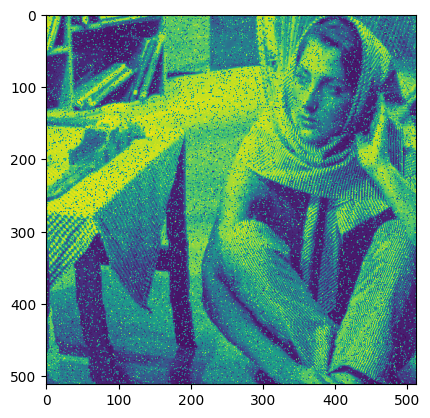

In [14]:
plt.imshow(five_percent_corrupted)

# Denoising Using Median Filters

In [19]:
print("3x3 filter:-", calculate_psnr(clean_image, apply_3x3_filter(five_percent_corrupted)))  # PSNR)
print("4x4 filter:-", calculate_psnr(clean_image, apply_4x4_filter(five_percent_corrupted)))  # PSNR)
print("5x5 filter:-", calculate_psnr(clean_image, apply_5x5_filter(five_percent_corrupted)))  # PSNR)
print("6x6 filter:-", calculate_psnr(clean_image, apply_6x6_filter(five_percent_corrupted)))  # PSNR)

3x3 filter:- 32.664440379367434
4x4 filter:- 31.341823497421103
5x5 filter:- 31.53371272545617
6x6 filter:- 30.947369332938187


# 3x3 Median filter give better score for 5%

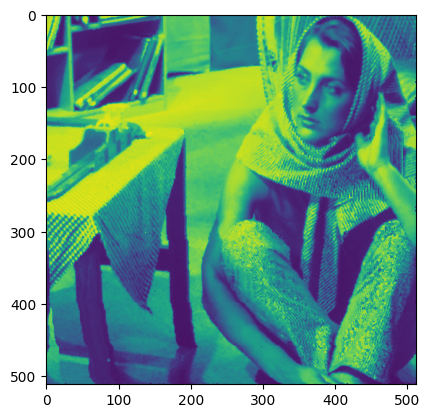

In [ ]:
median_3x3_denoise_image = apply_3x3_filter(five_percent_corrupted)
cv2.imwrite("/content/drive/MyDrive/DIP/A2/Q1/denoise_3x3_five_barbara_gray.bmp",median_3x3_denoise_image)
plt.imshow(median_3x3_denoise_image)

In [ ]:
calculate_psnr(clean_image, median_3x3_denoise_image)  # PSNR

32.658400334874415

# 15 percent corrupted pixels

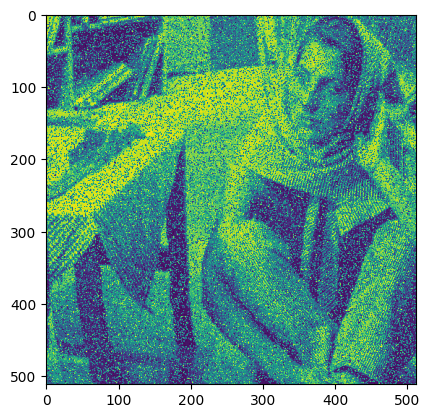

In [23]:
fivteen_percent_corrupted = add_salt_n_pepper_noise(clean_image, 15)
cv2.imwrite("/content/drive/MyDrive/DIP/A2/Q1/fivteen_barbara_gray.bmp",fivteen_percent_corrupted)
plt.imshow(fivteen_percent_corrupted)

# Denoising Using 4x4 Median Filter

In [24]:
print("3x3 filter:-", calculate_psnr(clean_image, apply_3x3_filter(fivteen_percent_corrupted)))  # PSNR)
print("4x4 filter:-", calculate_psnr(clean_image, apply_4x4_filter(fivteen_percent_corrupted)))  # PSNR)
print("5x5 filter:-", calculate_psnr(clean_image, apply_5x5_filter(fivteen_percent_corrupted)))  # PSNR)
print("6x6 filter:-", calculate_psnr(clean_image, apply_6x6_filter(fivteen_percent_corrupted)))  # PSNR)

3x3 filter:- 32.10477724623311
4x4 filter:- 31.254559813810523
5x5 filter:- 31.31678556630812
6x6 filter:- 30.888879282922616


(512, 512)

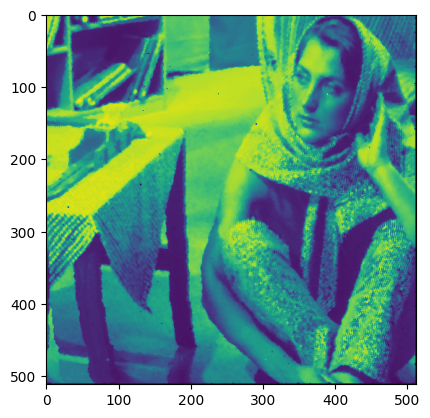

In [ ]:
median_4x4_denoise_image = apply_3x3_filter(fivteen_percent_corrupted)
cv2.imwrite("/content/drive/MyDrive/DIP/A2/Q1/denoise_4x4_fivteen_barbara_gray.bmp",median_4x4_denoise_image)
plt.imshow(median_4x4_denoise_image)
median_4x4_denoise_image.shape

In [ ]:
calculate_psnr(clean_image, median_4x4_denoise_image)  # PSNR

31.24993099708108

# 20 percent corrupted image

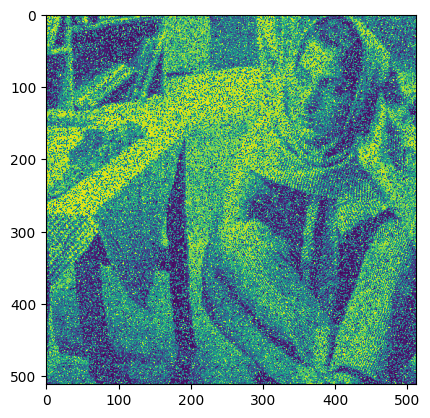

In [25]:
twenty_percent_corrupted = add_salt_n_pepper_noise(clean_image, 20)
cv2.imwrite("/content/drive/MyDrive/DIP/A2/Q1/twenty_barbara_gray.bmp",twenty_percent_corrupted)
plt.imshow(twenty_percent_corrupted)

# Denoising Using 5x5 Median Filter

In [26]:
print("3x3 filter:-", calculate_psnr(clean_image, apply_3x3_filter(twenty_percent_corrupted)))  # PSNR)
print("4x4 filter:-", calculate_psnr(clean_image, apply_4x4_filter(twenty_percent_corrupted)))  # PSNR)
print("5x5 filter:-", calculate_psnr(clean_image, apply_5x5_filter(twenty_percent_corrupted)))  # PSNR)
print("6x6 filter:-", calculate_psnr(clean_image, apply_6x6_filter(twenty_percent_corrupted)))  # PSNR)

3x3 filter:- 31.809725687182503
4x4 filter:- 31.16511446280193
5x5 filter:- 31.22269808830959
6x6 filter:- 30.841091455351805


(512, 512)

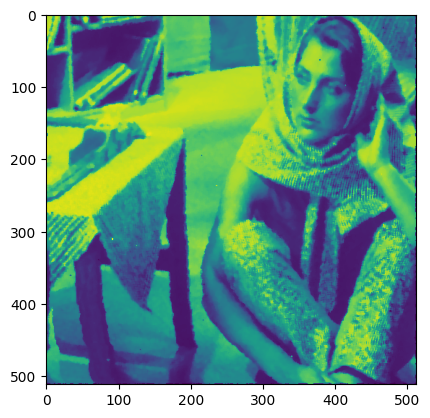

In [ ]:
median_5x5_denoise_image = apply_5x5_filter(twenty_percent_corrupted)
cv2.imwrite("/content/drive/MyDrive/DIP/A2/Q1/denoise_5x5_twenty_barbara_gray.bmp",median_5x5_denoise_image)
plt.imshow(median_5x5_denoise_image)
median_5x5_denoise_image.shape

In [ ]:
calculate_psnr(clean_image, median_5x5_denoise_image)  # PSNR

31.223836369351275

# 25 percent corrupted pixels

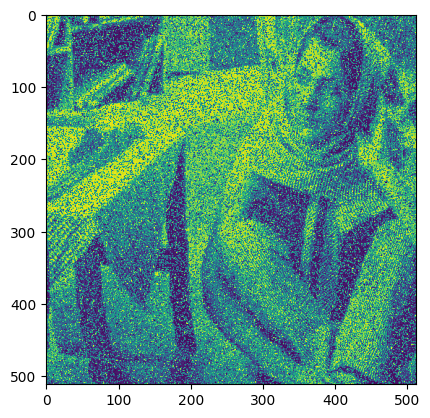

In [29]:
twentyfive_percent_corrupted = add_salt_n_pepper_noise(clean_image, 20)
cv2.imwrite("/content/drive/MyDrive/DIP/A2/Q1/twentyfive_barbara_gray.bmp",twentyfive_percent_corrupted)
plt.imshow(twentyfive_percent_corrupted)

# Denoising Using 6x6 Median Filter

In [30]:
print("3x3 filter:-", calculate_psnr(clean_image, apply_3x3_filter(twentyfive_percent_corrupted)))  # PSNR)
print("4x4 filter:-", calculate_psnr(clean_image, apply_4x4_filter(twentyfive_percent_corrupted)))  # PSNR)
print("5x5 filter:-", calculate_psnr(clean_image, apply_5x5_filter(twentyfive_percent_corrupted)))  # PSNR)
print("6x6 filter:-", calculate_psnr(clean_image, apply_6x6_filter(twentyfive_percent_corrupted)))  # PSNR)

3x3 filter:- 31.834081178228146
4x4 filter:- 31.15674877882381
5x5 filter:- 31.224243670221608
6x6 filter:- 30.849899349449682


(512, 512)

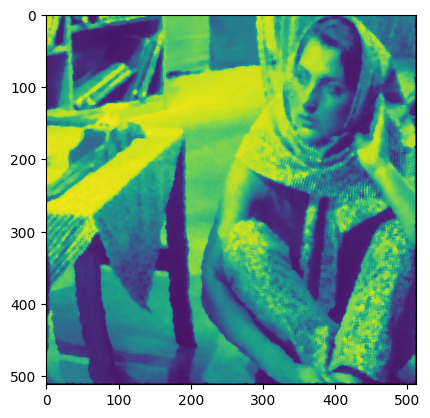

In [ ]:
median_6x6_denoise_image = apply_3x3_filter(twentyfive_percent_corrupted)
cv2.imwrite("/content/drive/MyDrive/DIP/A2/Q1/denoise_6x6_twentyfive_barbara_gray.bmp",median_6x6_denoise_image)
plt.imshow(median_6x6_denoise_image)
median_6x6_denoise_image.shape

In [ ]:
calculate_psnr(clean_image, median_6x6_denoise_image)  # PSNR

30.86435752350368